In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('../../..')

In [24]:
import torch

from magrec.prop.Propagator import MagnetizationPropagator2d
from magrec.misc.plot import plot_n_components
from magrec import __datapath__

## 2.1. Check `MagneticPropagator2d`

Below we import a dataset with a sample magnetization to check that `MagnetizationPropagator2d(magnetization)` gives a correct magnetic field.

In [12]:
from magrec.misc.load import load_matlab_simulation

In [28]:
datapath = __datapath__ / "SimulatedData/OutOfPlaneSimulations/BzFields/NoNoise/Blob_simulation1"
data = load_matlab_simulation(datapath=datapath)

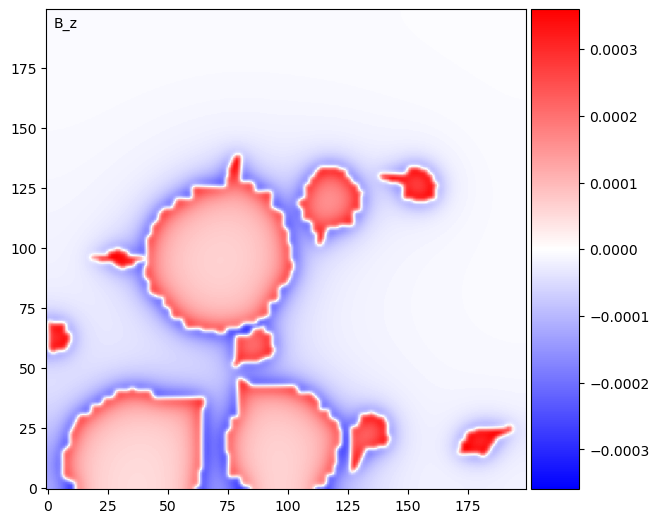

In [48]:
plot_n_components(data["B"]["data"], symmetric=True, labels=[r"B_z"], cmap="bwr")

In [38]:
data["M"]["data"].shape

(200, 200)

In [37]:
data["M"]["data"][None,...].shape[-3]

1

Optimization in this case should be easy and require just one predefined tensor which tracks its gradient. We will create a tensor, called `mag_estimate` and make it `require_grad = true`. Then we will add its values to the optimizer, and run through a `propagator = MagnetizationPropagator2d()`. At each optimizer step, it will directly optimize the values of the `mag_estimate` such that `propagator(mag_estimate) = field_features`. 

In [ ]:
wh = (256, 256) # size of the magnetization image
d = 5e-10       # distance between the top of the magnetized surface and the measurement plane
th = 5e-10      # that I don't know yet, thickness of the magnetized layer

propagator = MagnetizationPropagator2d(source_shape=wh, abstand=d, layer_thickness=th)

mag_estimate_x = torch.empty(size=wh, requires_grad=True)  # x component of the planar magnetization
mag_estimate_y = torch.empty(size=wh, requires_grad=True)  # y component of the planar magnetization
mag_estimate_z = torch.empty(size=wh, requires_grad=False)  # z component of the planar magnetization, set to zero and not optimizable         


In [5]:
import sys
sys.path.append('../..')

In [6]:
import torch
from currec.core.Propagator import MagnetizationPropagator2d

from currec.plot.plot_field import plot_3components

## 2.1. Check `MagneticPropagator2d`

Below we import a dataset with a sample magnetization to check that `MagnetizationPropagator2d(magnetization)` gives a correct magnetic field.

In [11]:
from currec.misc.utils import load_data_legacy

In [13]:
propagator_legacy = load_data_legacy(data_path='../../data_nobackup/SimulatedData/Blob_simulation_1')

[[ 3.88565883e-06  8.52551110e-06 -5.85321890e-05 ... -1.30149343e-05
   7.92190457e-06  2.80162736e-06]
 [-1.05879832e-05  1.59894866e-05 -2.17514432e-05 ...  3.19665058e-05
  -2.88877355e-05 -1.67961691e-06]
 [-4.80182887e-06  6.23473027e-06  2.45667681e-05 ... -7.53064015e-06
   3.92524970e-05 -1.88681481e-05]
 ...
 [-4.88696569e-05 -3.96456466e-05 -4.88493708e-05 ... -7.34024764e-06
  -4.60010770e-05  1.97177015e-05]
 [-1.49861620e-06  4.02736127e-05  3.01727864e-05 ...  7.30713186e-06
   1.19904871e-05 -2.02883744e-05]
 [ 3.03970378e-05  2.14197395e-05  2.53995412e-05 ... -6.01567440e-06
  -6.57140666e-06 -4.47680151e-05]]
[[ 3.88565883e-06  8.52551110e-06 -5.85321890e-05 ... -1.30149343e-05
   7.92190457e-06  2.80162736e-06]
 [-1.05879832e-05  1.59894866e-05 -2.17514432e-05 ...  3.19665058e-05
  -2.88877355e-05 -1.67961691e-06]
 [-4.80182887e-06  6.23473027e-06  2.45667681e-05 ... -7.53064015e-06
   3.92524970e-05 -1.88681481e-05]
 ...
 [-4.88696569e-05 -3.96456466e-05 -4.8849370

In [15]:
propagator_legacy.Magnetisation.

AttributeError: 'NoneType' object has no attribute 'shape'

Optimization in this case should be easy and require just one predefined tensor which tracks its gradient. We will create a tensor, called `mag_estimate` and make it `require_grad = true`. Then we will add its values to the optimizer, and run through a `propagator = MagnetizationPropagator2d()`. At each optimizer step, it will directly optimize the values of the `mag_estimate` such that `propagator(mag_estimate) = field_features`. 

In [ ]:
wh = (256, 256) # size of the magnetization image
d = 5e-10       # distance between the top of the magnetized surface and the measurement plane
th = 5e-10      # that I don't know yet, thickness of the magnetized layer

propagator = MagnetizationPropagator2d(source_shape=wh, abstand=d, layer_thickness=th)

mag_estimate_x = torch.empty(size=wh, requires_grad=True)  # x component of the planar magnetization
mag_estimate_y = torch.empty(size=wh, requires_grad=True)  # y component of the planar magnetization
mag_estimate_z = torch.empty(size=wh, requires_grad=False)  # z component of the planar magnetization, set to zero and not optimizable         